In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import colors as mcolors

In [2]:
# Constants
DATA_PATH = "../../tmp/"
DEBUG = False

In [3]:
BRUTE_FORCE_COLOR = mcolors.to_rgba("#C6110B") #"lightcoral"
GULA_COLOR = mcolors.to_rgba("#0B7FF3") #"skyblue"
WHIS_VALUE = 10000000

# 1. Scalability

- all states transitions of the Boolean network are generated
- Evaluate learning time for [1,5,10,25,50,75,100]% of random set of those transitions (10 runs)
- For each semantics (synchronous, asynchronous, general)

In [4]:
def make_figure(df, figure_path):
    sns.set_theme(style="whitegrid")
    for semantics in df.semantics.unique():
        fig = plt.figure(semantics)
        df_semantics = df[(df["semantics"] == semantics)]
        time_out_size = df_semantics[df_semantics["run_time"] == -1]["benchmark_size"].unique()
        #time_out_size = min(time_out_size)
        #df_semantics = df_semantics[df_semantics["run_time"] != -1]
        #df_semantics = df_semantics[df_semantics["benchmark_size"] < time_out_size]
        
        df_brute_force = df_semantics[df_semantics["method"] == "brute-force"]
        for benchmark_size in df_brute_force.benchmark_size.unique():
            time_out_percents = df_brute_force[(df_brute_force["benchmark_size"] == benchmark_size) & (df_brute_force["run_time"] == -1)].expected_train_percent.unique()
            df_brute_force = df_brute_force[(df_brute_force["benchmark_size"] != benchmark_size) | (~df_brute_force["expected_train_percent"].isin(time_out_percents))]
        
        df_gula = df_semantics[df_semantics["method"] == "gula"]
        for benchmark_size in df_gula.benchmark_size.unique():
            time_out_percents = df_gula[(df_gula["benchmark_size"] == benchmark_size) & (df_gula["run_time"] == -1)].expected_train_percent.unique()
            #print(benchmark_size, ":", time_out_percents)
            df_gula = df_gula[(df_gula["benchmark_size"] != benchmark_size) | (~df_gula["expected_train_percent"].isin(time_out_percents))]
            #for i in df_gula.expected_train_percent.unique():
            #    print(i, ": ", df_gula[(df_gula["benchmark_size"] == benchmark_size) & (df_gula["expected_train_percent"] == i)].run_time.count())
        
        PROPS = {
        'boxprops':{'edgecolor':BRUTE_FORCE_COLOR},
        'medianprops':{'color':BRUTE_FORCE_COLOR},
        'whiskerprops':{'color':BRUTE_FORCE_COLOR},
        'capprops':{'color':BRUTE_FORCE_COLOR}
        }
        
        #df_brute_force = df_semantics[df_semantics["method"] == "brute_force"]
        ax = sns.boxplot(x="benchmark_size", y="run_time", hue="expected_train_percent", data=df_brute_force,
                        #whiskerprops = dict(color=BRUTE_FORCE_COLOR, linewidth=2.0, alpha= 0.8),
                        #capprops = dict(color=BRUTE_FORCE_COLOR, linewidth=2.0, alpha= 0.8),
                        whis=WHIS_VALUE,
                        palette="Reds",
                        **PROPS)
        
        PROPS = {
        'boxprops':{'edgecolor':GULA_COLOR},
        'medianprops':{'color':GULA_COLOR},
        'whiskerprops':{'color':GULA_COLOR},
        'capprops':{'color':GULA_COLOR}
        }
        
        ax = sns.boxplot(x="benchmark_size", y="run_time", hue="expected_train_percent", data=df_gula,
                        #whiskerprops = dict(color=GULA_COLOR, linewidth=2.0, alpha= 0.8),
                        #capprops = dict(color=GULA_COLOR, linewidth=2.0, alpha= 0.8),
                        whis=WHIS_VALUE,
                        palette="Blues",
                        **PROPS)
        
        #ax.set_title(str(semantics)+" semantics")
        #ax.set(ylim=(0.0, 1000.000))
        ax.set_yscale("log")
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        #ax.legend(title="Quantity of Transitions",loc='upper left')
        ax.set(xlabel='Number of variables', ylabel='Run time in seconds')
        ax.set_xlabel("Number of variables",fontsize=16)
        ax.set_ylabel("Run time in seconds",fontsize=16)
        ax.axhline(1000, ls='-', color="red")
        for i in range(0,df_gula.benchmark_size.nunique()):
            ax.axvline(i+0.5, ls='--', color="gray", alpha = 0.1)
        #ax.despine(left=True)
        
        # Legend
        h,l = ax.get_legend_handles_labels()
        l = [str(int(float(i)*100))+"%" for i in l]
        l1 = ax.legend(h[:int(len(h)/2)],l[:int(len(l)/2)], loc='upper left', title="Brute force: input transitions")
        l2 = ax.legend(h[int(len(h)/2):],l[int(len(l)/2):], loc='lower right', title="GULA: input transitions")
        ax.add_artist(l1) # we need this because the 2nd call to legend() erases the first
        
        fig.set_size_inches(10,6)
        fig.savefig(figure_path, bbox_inches='tight')
        plt.show()

C:\Users\Tony\AppData\Local\Temp\ipykernel_10540\4161515278.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(DATA_PATH+'bn_benchmarks_scalability_brute_force_0_to_10_complete.csv'))


,method,semantics,benchmark_name,benchmark_size,transitions,mode,expected_train_percent,real_train_percent,train_size,run_time,max_unknown
0,gula,synchronous,n5s3,5,32,random_transitions,0.1,0.09,3,0.000500,0.0
1,gula,synchronous,n5s3,5,32,random_transitions,0.1,0.09,3,0.001001,0.0
2,gula,synchronous,n5s3,5,32,random_transitions,0.1,0.09,3,0.001501,0.0
3,gula,synchronous,n5s3,5,32,random_transitions,0.1,0.09,3,0.001498,0.0
4,gula,synchronous,n5s3,5,32,random_transitions,0.1,0.09,3,0.001000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
391,brute-force,synchronous,fission_yeast,10,1024,random_transitions,1.0,1.00,1024,296.204470,0.0
392,brute-force,synchronous,fission_yeast,10,1024,random_transitions,1.0,1.00,1024,304.771141,0.0
393,brute-force,synchronous,fission_yeast,10,1024,random_transitions,1.0,1.00,1024,308.754076,0.0
394,brute-force,synchronous,fission_yeast,10,1024,random_transitions,1.0,1.00,1024,311.803437,0.0


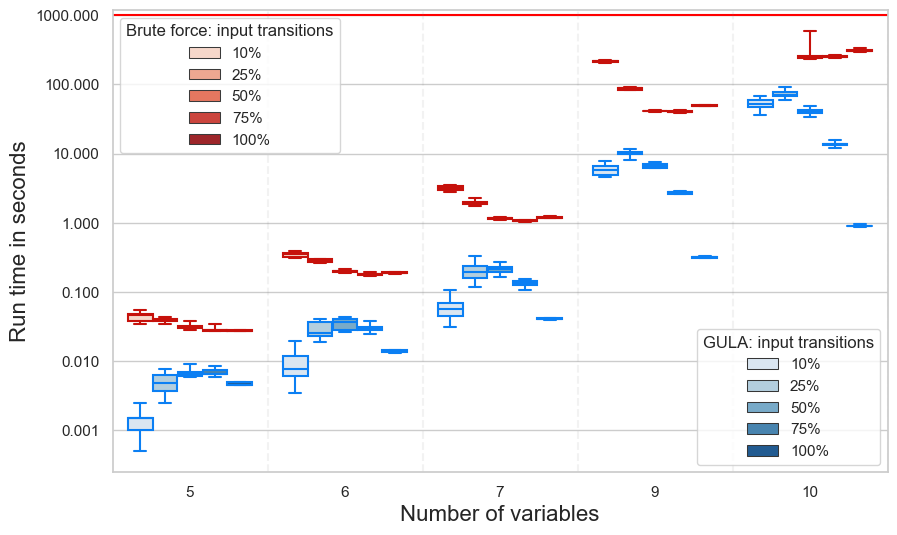

C:\Users\Tony\AppData\Local\Temp\ipykernel_10540\4161515278.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(DATA_PATH+'bn_benchmarks_scalability_brute_force_0_to_10_partial.csv'))


,method,semantics,benchmark_name,benchmark_size,transitions,mode,expected_train_percent,real_train_percent,train_size,run_time,max_unknown
0,gula,synchronous,n5s3,5,32,random_transitions,0.10,0.09,3,0.0015,0.5
1,gula,synchronous,n5s3,5,32,random_transitions,0.10,0.09,3,0.0015,0.5
2,gula,synchronous,n5s3,5,32,random_transitions,0.10,0.09,3,0.0015,0.5
3,gula,synchronous,n5s3,5,32,random_transitions,0.10,0.09,3,0.0020,0.5
4,gula,synchronous,n5s3,5,32,random_transitions,0.10,0.09,3,0.0015,0.5
...,...,...,...,...,...,...,...,...,...,...,...
310,brute-force,synchronous,fission_yeast,10,1024,random_transitions,0.10,0.10,102,-1.0000,0.5
311,brute-force,synchronous,fission_yeast,10,1024,random_transitions,0.25,0.25,256,-1.0000,0.5
312,brute-force,synchronous,fission_yeast,10,1024,random_transitions,0.50,0.50,512,-1.0000,0.5
313,brute-force,synchronous,fission_yeast,10,1024,random_transitions,0.75,0.75,768,-1.0000,0.5


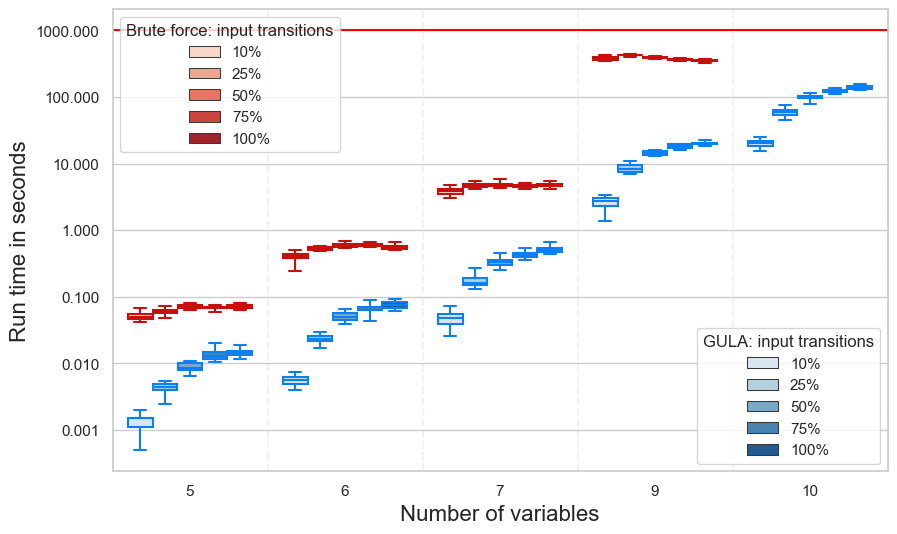

In [5]:
if DEBUG:
    df = pd.read_csv(DATA_PATH+'debug_bn_benchmarks_scalability_gula.csv')
    df = df.append(pd.read_csv(DATA_PATH+'debug_bn_benchmarks_scalability_brute_force.csv'))
    make_figure(df)
else:
    df = pd.read_csv(DATA_PATH+'bn_benchmarks_scalability_gula_0_to_10_complete.csv')
    df = df.append(pd.read_csv(DATA_PATH+'bn_benchmarks_scalability_brute_force_0_to_10_complete.csv'))
    display(df)
    make_figure(df,"bn_benchmarks_gula_scalability_complete.pdf")

    df = pd.read_csv(DATA_PATH+'bn_benchmarks_scalability_gula_0_to_10_partial.csv')
    df = df.append(pd.read_csv(DATA_PATH+'bn_benchmarks_scalability_brute_force_0_to_10_partial.csv'))
    display(df)
    make_figure(df,"bn_benchmarks_gula_scalability_partial.pdf")
